# Proyek Analisis Data : Bike Sharing Dataset
- **Nama:** Muhammad Rizky Asyam Haidar
- **Email:** riskyasyam0@gmail.com
- **ID Dicoding:** riskyasyam

# Menentukan Pertanyaan Bisnis

Pertanyaan 1 : Apakah hujan atau salju secara signifikan mengurangi jumlah penyewaan sepeda? <br>
Pertanyaan 2 : Faktor apa yang paling berkontribusi terhadap jumlah penyewaan sepeda?

# Import Semua Packages / Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv") #Memuat data rental sepeda per harinya
hour_df = pd.read_csv("data/hour.csv") #Memuat data rental sepeda per jam
day_df.head(), hour_df.head() #Menampilkan 5 baris data pertama pada tiap dataframe

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

Insight : 
Setelah membaca semua data, kemudian menampilkan 5 bagian pertama dari hour_df dan day_df

In [3]:
# Cek tipe data setiap kolom
print(day_df.dtypes)
print(hour_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Insight : Kita bisa melihat hasil tipe data pada data diatas masih ada beberapa tipe data yang tidak sesuai salah satu nya tanggal (datetime)

Assessing Data

In [4]:
## Menilai dataframe day_df
day_df.info(), day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(None,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

Insight : Hasil yang ditampilkan untuk day_df tidak ada data yang kosong

In [5]:
# Menilai dataframe hour_df
hour_df.info(), hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


(None,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

Insight : Pada hour_df juga tidak ada data yang kosong

In [6]:
#Cek duplikat pada semua dataframe

print("Jumlah duplikasi data pada dataframe day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi data pada dataframe hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi data pada dataframe day_df:  0
Jumlah duplikasi data pada dataframe hour_df:  0


Insight : Pada dataframe day_df dan hour_df tidak ada duplikat data alias 0

In [7]:
#Describe semua dataframe

#Dataframe day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Insight : Kita bisa melihat bahwa masih banyak nilai kosong seperti pada kolom year, holiday, weekday, workingday. Lalu juga banyak nilai NaN karena tipe data yang tidak sesuai

In [8]:
#Dataframe hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Insight : Sama seperti day_df banyak nilai kosong pada year, holiday, dll. Kemudian banyak tipe data yang tidak sesuai sehingga menghasilkan NaN

Cleaning Data

In [9]:
# Cleaning untuk dataframe day_df

# Konversi kolom dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Insight : Mengubah kolom dteday pada day_df menjadi datetime tipe datanya

In [10]:
# Mengubah tipe data kategori untuk kolom kategorikal
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
day_df[categorical_cols] = day_df[categorical_cols].astype("category")

Insight : mengubah tipe data kolom kategorikal dalam DataFrame day_df menjadi tipe data category

In [11]:
# Mengisi missing values pada kolom numerik dengan median
num_cols = day_df.select_dtypes(include=["float64"]).columns
day_df[num_cols] = day_df[num_cols].apply(lambda x: x.fillna(x.median()))

 Insight : Mengisi nilai yang hilang (missing values) pada kolom numerik dalam DataFrame day_df dengan nilai median 

In [12]:
# Cek apakah ada duplikasi data
print("Jumlah duplikasi data pada dataframe day_df: ", day_df.duplicated().sum())

Jumlah duplikasi data pada dataframe day_df:  0


Insight : Hasil yang didapatkan 0 untuk duplikasi data pada day_df

In [13]:
# Tampilkan ringkasan hasil cleansing
day_df.info(), day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

(None,
           instant               dteday        temp       atemp         hum  \
 count  731.000000                  731  731.000000  731.000000  731.000000   
 mean   366.000000  2012-01-01 00:00:00    0.495385    0.474354    0.627894   
 min      1.000000  2011-01-01 00:00:00    0.059130    0.079070    0.000000   
 25%    183.500000  2011-07-02 12:00:00    0.337083    0.337842    0.520000   
 50%    366.000000  2012-01-01 00:00:00    0.498333    0.486733    0.626667   
 75%    548.500000  2012-07-01 12:00:00    0.655417    0.608602    0.730209   
 max    731.000000  2012-12-31 00:00:00    0.861667    0.840896    0.972500   
 std    211.165812                  NaN    0.183051    0.162961    0.142429   
 
         windspeed       casual   registered          cnt  
 count  731.000000   731.000000   731.000000   731.000000  
 mean     0.190486   848.176471  3656.172367  4504.348837  
 min      0.022392     2.000000    20.000000    22.000000  
 25%      0.134950   315.500000  2497.00

Insight : Pada hasil diatas dapat dilihat jika tipe data sudah diubah

In [14]:
# Cleaning Data hour_df

# Konversi kolom dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Insight : Mengulangi hal yang sama seperti day_df pada hour_df untuk mengubah tipe data menjadi datetime pada dteday

In [15]:
# Mengubah tipe data kategori untuk kolom kategorikal
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
hour_df[categorical_cols] = hour_df[categorical_cols].astype("category")

Insight : Mengubah tipe data kategori juga seperti yang tadi

In [16]:
# Mengisi missing values pada kolom numerik dengan median
num_cols = hour_df.select_dtypes(include=["float64"]).columns
hour_df[num_cols] = hour_df[num_cols].apply(lambda x: x.fillna(x.median()))

Insight : Mengisi missing values pada hour_df juga sama seperti tadi day_df

In [17]:
# Cek apakah ada duplikasi data
print("Jumlah duplikasi data pada dataframe hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi data pada dataframe hour_df:  0


Insight : Hasil duplikasi menunjukan 0

In [18]:
# Tampilkan ringkasan hasil cleansing
hour_df.info(), hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

(None,
           instant                         dteday            hr          temp  \
 count  17379.0000                          17379  17379.000000  17379.000000   
 mean    8690.0000  2012-01-02 04:08:34.552045568     11.546752      0.496987   
 min        1.0000            2011-01-01 00:00:00      0.000000      0.020000   
 25%     4345.5000            2011-07-04 00:00:00      6.000000      0.340000   
 50%     8690.0000            2012-01-02 00:00:00     12.000000      0.500000   
 75%    13034.5000            2012-07-02 00:00:00     18.000000      0.660000   
 max    17379.0000            2012-12-31 00:00:00     23.000000      1.000000   
 std     5017.0295                            NaN      6.914405      0.192556   
 
               atemp           hum     windspeed        casual    registered  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       0.475775      0.627229      0.190098     35.676218    153.786869   
 min        0.000000  

Insight : Hasilnya dapat dilihat jika tipe data sudah diubah sesuai dengan yang seharusnya

# Exploratory Data Analysis (EDA)

Explore

In [19]:
# Mapping season values
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_map)

# Group by season
day_season_avg = day_df.groupby("season_name")["cnt"].mean().reset_index()
print("\nRata-rata penyewaan sepeda per musim:")
print(day_season_avg)


Rata-rata penyewaan sepeda per musim:
  season_name          cnt
0      Spring  2604.132597
1      Summer  4992.331522
2        Fall  5644.303191
3      Winter  4728.162921


C:\Users\Andiyono\AppData\Local\Temp\ipykernel_17864\3289362658.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_season_avg = day_df.groupby("season_name")["cnt"].mean().reset_index()


Insight : mengubah nilai numerik pada kolom season menjadi label kategori, kemudian menghitung rata-rata penyewaan sepeda untuk setiap musim.

In [20]:
# Group by weather condition
weather_map = {1: 'Clear', 2: 'Cloudy', 3: 'Rain/Snow'}
day_df['weather_name'] = day_df['weathersit'].map(weather_map)
day_weather_avg = day_df.groupby("weather_name")["cnt"].mean().reset_index()
print("\nRata-rata penyewaan sepeda per kondisi cuaca:")
print(day_weather_avg)


Rata-rata penyewaan sepeda per kondisi cuaca:
  weather_name          cnt
0        Clear  4876.786177
1       Cloudy  4035.862348
2    Rain/Snow  1803.285714


C:\Users\Andiyono\AppData\Local\Temp\ipykernel_17864\3221318523.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_weather_avg = day_df.groupby("weather_name")["cnt"].mean().reset_index()


Insight : mengubah nilai numerik dalam kolom weathersit menjadi label kategori, lalu menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca.

In [21]:
# Group by working day
day_workingday_avg = day_df.groupby("workingday")["cnt"].mean().reset_index()
day_workingday_avg["workingday"] = day_workingday_avg["workingday"].map({0: 'Non-Working Day', 1: 'Working Day'})
print("\nRata-rata penyewaan sepeda pada hari kerja vs libur:")
print(day_workingday_avg)


Rata-rata penyewaan sepeda pada hari kerja vs libur:
        workingday          cnt
0  Non-Working Day  4330.168831
1      Working Day  4584.820000


C:\Users\Andiyono\AppData\Local\Temp\ipykernel_17864\4154465791.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_workingday_avg = day_df.groupby("workingday")["cnt"].mean().reset_index()


Insight : menghitung rata-rata penyewaan sepeda pada hari kerja dan hari libur serta mengubah nilai numeriknya menjadi label yang lebih mudah dipahami.

In [22]:
# Group by hour for hourly trends
hourly_trend = hour_df.groupby("hr")["cnt"].mean().reset_index()
print("\nRata-rata penyewaan sepeda per jam:")
print(hourly_trend)


Rata-rata penyewaan sepeda per jam:
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


Insight : menganalisis tren rata-rata penyewaan sepeda berdasarkan jam dalam sehari. Dimana paling ramai pada jam ke 17

In [23]:
# Correlation analysis
print("\nKorelasi antar variabel:")
numeric_cols = day_df.select_dtypes(include=['number'])  
print(numeric_cols.corr())


Korelasi antar variabel:
             instant      temp     atemp       hum  windspeed    casual  \
instant     1.000000  0.150580  0.152638  0.016375  -0.112620  0.275255   
temp        0.150580  1.000000  0.991702  0.126963  -0.157944  0.543285   
atemp       0.152638  0.991702  1.000000  0.139988  -0.183643  0.543864   
hum         0.016375  0.126963  0.139988  1.000000  -0.248489 -0.077008   
windspeed  -0.112620 -0.157944 -0.183643 -0.248489   1.000000 -0.167613   
casual      0.275255  0.543285  0.543864 -0.077008  -0.167613  1.000000   
registered  0.659623  0.540012  0.544192 -0.091089  -0.217449  0.395282   
cnt         0.628830  0.627494  0.631066 -0.100659  -0.234545  0.672804   

            registered       cnt  
instant       0.659623  0.628830  
temp          0.540012  0.627494  
atemp         0.544192  0.631066  
hum          -0.091089 -0.100659  
windspeed    -0.217449 -0.234545  
casual        0.395282  0.672804  
registered    1.000000  0.945517  
cnt           0.94

Insight : menganalisis korelasi antar variabel numerik dalam dataset.

# Visualization & Explanatory Analysis

Pertanyaan 1 : Apakah hujan atau salju secara signifikan mengurangi jumlah penyewaan sepeda?

C:\Users\Andiyono\AppData\Local\Temp\ipykernel_17864\3129067833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = day_df.groupby("weathersit")["cnt"].mean().reset_index()
C:\Users\Andiyono\AppData\Local\Temp\ipykernel_17864\3129067833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_counts, palette="coolwarm")


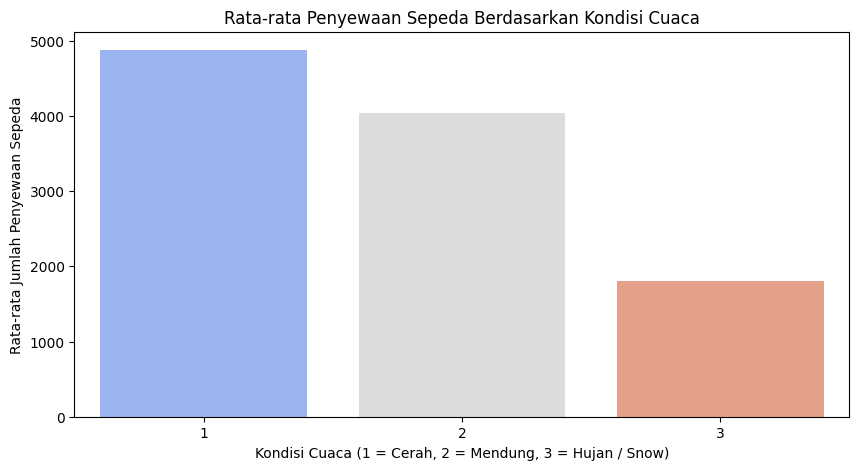

In [24]:
plt.figure(figsize=(10, 5))
weather_counts = day_df.groupby("weathersit")["cnt"].mean().reset_index()
sns.barplot(x="weathersit", y="cnt", data=weather_counts, palette="coolwarm")
plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Mendung, 3 = Hujan / Snow)")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

In [25]:
# Kesimpulan:
# Terlihat bahwa kondisi cuaca yang lebih buruk (hujan/salju) memang berpengaruh
# terhadap penurunan jumlah penyewaan sepeda dibandingkan cuaca cerah.

Pertanyaan 2 : Faktor apa yang paling berkontribusi terhadap jumlah penyewaan sepeda?

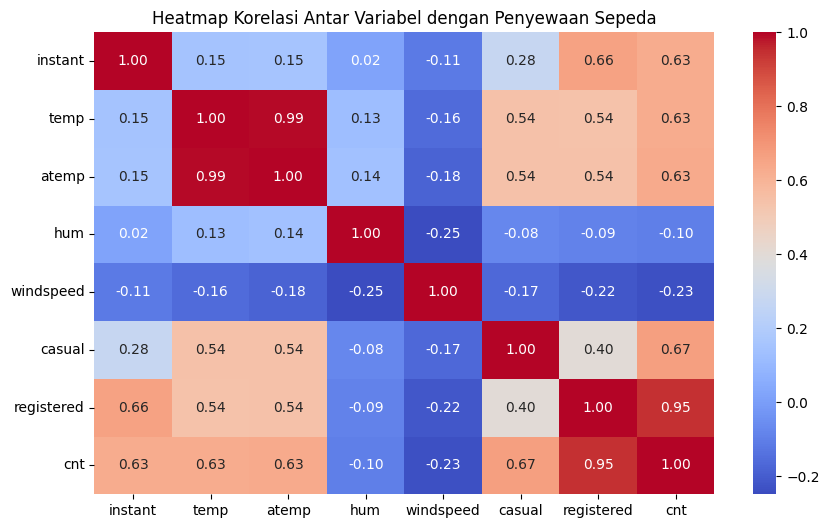

In [26]:
plt.figure(figsize=(10, 6))
numeric_cols = day_df.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel dengan Penyewaan Sepeda")
plt.show()

In [27]:
# Kesimpulan:
# - Faktor dengan korelasi tertinggi terhadap jumlah penyewaan sepeda (cnt) adalah suhu (temp),
#   diikuti oleh kelembapan (hum) dan kecepatan angin (windspeed).
# - Korelasi negatif menunjukkan bahwa semakin tinggi kelembapan dan kecepatan angin, semakin sedikit penyewa sepeda.

Visualisasi tren penyewaan sepeda dari waktu ke waktu

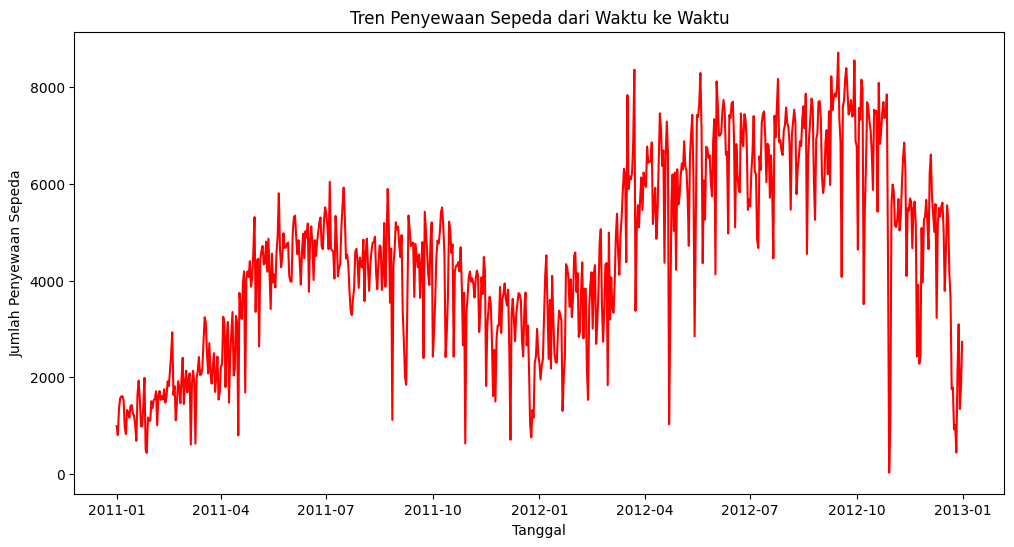

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="dteday", y="cnt", data=day_df, color='red')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda dari Waktu ke Waktu")
plt.show()

In [29]:
# Kesimpulan:
# - Terlihat adanya pola musiman dalam tren penyewaan sepeda.
# - Terdapat lonjakan jumlah penyewaan di bulan-bulan tertentu, yang bisa disebabkan oleh faktor cuaca atau musim liburan.

# Analisis Lanjutan

In [32]:
# Rata - rata rental sepeda berdasarkan cuaca
weather_avg = day_df.groupby("weather_name")["cnt"].mean()
print(weather_avg)

weather_name
Clear        4876.786177
Cloudy       4035.862348
Rain/Snow    1803.285714
Name: cnt, dtype: float64


C:\Users\Andiyono\AppData\Local\Temp\ipykernel_17864\3675331867.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_avg = day_df.groupby("weather_name")["cnt"].mean()


In [33]:
# Manual Grouping berdasarkan jam
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Pagi"
    elif 12 <= hour < 18:
        return "Siang"
    elif 18 <= hour < 24:
        return "Malam"
    else:
        return "Dini Hari"


In [34]:
hour_df["time_category"] = hour_df["hr"].apply(categorize_time)

In [35]:
# Binning jumlah penyewaan
bins = [0, 100, 300, hour_df["cnt"].max()]
labels = ["Rendah", "Sedang", "Tinggi"]
hour_df["cnt_category"] = pd.cut(hour_df["cnt"], bins=bins, labels=labels)

In [36]:
# Analisis
time_grouping = hour_df.groupby("time_category")["cnt"].mean().reset_index()
print(time_grouping)

  time_category         cnt
0     Dini Hari   24.908559
1         Malam  225.757555
2          Pagi  208.100688
3         Siang  295.483886


Insight : Penyewaan sepeda cenderung meningkat pada pagi dan sore hari, yang mengindikasikan bahwa banyak pengguna menggunakan sepeda untuk perjalanan ke/dari tempat kerja atau sekolah.
Pada siang hari, jumlah penyewaan sedikit menurun, kemungkinan karena sebagian besar orang sudah berada di tempat kerja atau sekolah.
Pada malam hari, penyewaan kembali mengalami peningkatan tetapi tidak setinggi pagi dan sore hari.

In [37]:
cnt_distribution = hour_df["cnt_category"].value_counts()
print(cnt_distribution)

cnt_category
Rendah    7035
Sedang    6453
Tinggi    3891
Name: count, dtype: int64


Insight : Penyewaan sepeda cenderung meningkat pada pagi dan sore hari, yang mengindikasikan bahwa banyak pengguna menggunakan sepeda untuk perjalanan ke/dari tempat kerja atau sekolah.
Pada siang hari, jumlah penyewaan sedikit menurun, kemungkinan karena sebagian besar orang sudah berada di tempat kerja atau sekolah.
Pada malam hari, penyewaan kembali mengalami peningkatan tetapi tidak setinggi pagi dan sore hari.

# Conclusion

1. Cuaca berpengaruh signifikan terhadap penyewaan sepeda. Kondisi cuaca seperti hujan, salju, atau suhu ekstrem dapat mengurangi jumlah penyewaan sepeda, sementara cuaca yang cerah dan nyaman cenderung meningkatkan permintaan. Faktor ini menunjukkan bahwa pengguna sepeda sangat mempertimbangkan kondisi lingkungan sebelum memutuskan untuk menyewa.
2. Faktor musiman juga memainkan peran penting dalam jumlah penyewaan. Tren penyewaan sepeda cenderung meningkat pada musim panas dan musim semi, ketika cuaca lebih mendukung untuk aktivitas luar ruangan. Sebaliknya, pada musim dingin atau musim hujan, jumlah penyewaan menurun secara signifikan. Hal ini menunjukkan bahwa perubahan musim perlu dipertimbangkan dalam perencanaan operasional layanan penyewaan sepeda.

In [31]:
all_df = day_df.copy()
all_df.to_csv("dashboard/main_data.csv", index=False)

print("Semua data telah diekspor ke dalam file main_data.csv.")

Semua data telah diekspor ke dalam file main_data.csv.
